In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
base_dir = 'drive/ell409/src'

import os
os.chdir(base_dir)

In [0]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

import data_util as du
import performance_util as pu
import bayes_classifier as bayes
import knn_classifier as knn

from sklearn.decomposition import PCA
# from PCA import PCA
import kmeans

%matplotlib inline

In [0]:
data_dir = '../data/fashion_mnist/'
random_seed = 1
np.set_printoptions(precision=4)

In [6]:
X_train, Y_train = du.load_fashion_mnist(data_dir + 'train')
X_test, Y_test = du.load_fashion_mnist(data_dir + 't10k')

X_train = du.normalize2(X_train)
X_test = du.normalize2(X_test)

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [0]:
# Visualization of One Image

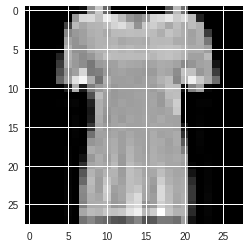

In [8]:
plt.imshow(np.reshape(X_train[10], (-1, 28)))
plt.gray()

In [0]:
# PCA (n_components = 25)

In [10]:
pca = PCA(n_components=5)
pca.fit(X_train)

#print(np.sum(pca.explained_variance_ratio_))

X_train_reduced_1 = pca.transform(X_train)
X_test_reduced_1 = pca.transform(X_test)

# Print reduced image
# plt.imshow(np.reshape(X_train_reduced_1[10], (-1, 5)))
# plt.gray()

print(X_train_reduced_1.shape)
print(X_test_reduced_1.shape)
print(np.sum(pca.explained_variance_ratio_))

(60000, 5)
(10000, 5)
0.5060561471460859


In [0]:
# Supervised Learning

## Bayes Classifier

### Training and Parameter Tuning

#### Class Conditional Distribution - (GMM - components = 1)

In [17]:
parameters = [1, 0.001, 10, X_train_reduced_1.shape[1], 0.0001, False]

model = bayes.bayes_classifier(estimator_type = 'GMM', param = parameters)
model.train(X_train_reduced_1, Y_train)

Class 0


KeyboardInterrupt: ignored

In [16]:
### Testing

Y_pred = model.predict(X_test_reduced_1)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

Accuracy on Test Set =  0.6872
Precision per Class
[0.727  0.8989 0.4894 0.6474 0.4601 0.8625 0.3285 0.7145 0.8778 0.7875]
Recall per Class
[0.751 0.862 0.6   0.76  0.53  0.552 0.135 0.906 0.905 0.871]
F1 Score per Class
[0.7388 0.88   0.5391 0.6992 0.4926 0.6732 0.1914 0.7989 0.8912 0.8272]
Macro Average Precision, Recall and F1 Score
[0.6793 0.6872 0.6833]
Micro Average Precision, Recall and F1 Score
[0.6872 0.6872 0.6872]




In [32]:
parameters = [2, 0.001, 10, X_train_reduced_1.shape[1], 0.0001, False]

model = bayes.bayes_classifier(estimator_type = 'GMM', param = parameters)
model.train(X_train_reduced_1, Y_train)

Class 0


KeyboardInterrupt: ignored

In [0]:
### Testing

Y_pred = model.predict(X_test_reduced_1)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

Accuracy on Test Set =  0.707
Precision per Class
[0.7505 0.9414 0.5339 0.6581 0.4904 0.8243 0.3164 0.8298 0.8948 0.7751]
Recall per Class
[0.731 0.835 0.575 0.818 0.539 0.718 0.212 0.819 0.927 0.896]
F1 Score per Class
[0.7406 0.885  0.5537 0.7294 0.5136 0.7675 0.2539 0.8244 0.9106 0.8312]
Macro Average Precision, Recall and F1 Score
[0.7015 0.707  0.7042]
Micro Average Precision, Recall and F1 Score
[0.707 0.707 0.707]




In [33]:
parameters = [4, 0.001, 10, X_train_reduced_1.shape[1], 0.0001, False]

model = bayes.bayes_classifier(estimator_type = 'GMM', param = parameters)
model.train(X_train_reduced_1, Y_train)

Class 0
Didn't converge, ran for 10 iterations
Class 1
Didn't converge, ran for 10 iterations
Class 2
Didn't converge, ran for 10 iterations
Class 3
Didn't converge, ran for 10 iterations
Class 4
Didn't converge, ran for 10 iterations
Class 5
Didn't converge, ran for 10 iterations
Class 6
Didn't converge, ran for 10 iterations
Class 7
Didn't converge, ran for 10 iterations
Class 8
Didn't converge, ran for 10 iterations
Class 9
Didn't converge, ran for 10 iterations


In [34]:
### Testing

Y_pred = model.predict(X_test_reduced_1)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

Accuracy on Test Set =  0.7211
Precision per Class
[0.7379 0.9298 0.5526 0.6915 0.4791 0.8422 0.4071 0.845  0.9188 0.7906]
Recall per Class
[0.749 0.874 0.567 0.753 0.629 0.742 0.252 0.845 0.905 0.895]
F1 Score per Class
[0.7434 0.901  0.5597 0.7209 0.5439 0.7889 0.3113 0.845  0.9118 0.8396]
Macro Average Precision, Recall and F1 Score
[0.7195 0.7211 0.7203]
Micro Average Precision, Recall and F1 Score
[0.7211 0.7211 0.7211]




In [11]:
# (no. of neighbours, minkowski parameter) 
knn_parameters = [(5, 1),
                  (5, 2), 
                  (10, 2),
                  (5, np.inf),
                  (5, -np.inf)]

    
for k1,p1 in knn_parameters:
    model = knn.knn_model(k = k1, p = p1)
    model.train(X_train_reduced_1, Y_train)
    Y_pred = model.predict(X_test_reduced_1)
    
    print("Number of Neighbours = %s , Minkowski Parameter = %s" % (str(k1), str(p1)))
    print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_test))
    print("Precision per Class")
    print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
    print("Recall per Class")
    print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
    print("F1 Score per Class")
    print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
    print("Macro Average Precision, Recall and F1 Score")
    print(pu.model_macro_average(Y_pred, Y_test, 10))
    print("Micro Average Precision, Recall and F1 Score")
    print(pu.model_micro_average(Y_pred, Y_test, 10))
    
    print()
    print()

Number of Neighbours = 5 , Minkowski Parameter = 1
Accuracy on Dev Set =  0.7379
Precision per Class
[0.7382 0.9302 0.5455 0.7195 0.562  0.8366 0.4618 0.8361 0.9103 0.8125]
Recall per Class
[0.767 0.88  0.599 0.767 0.598 0.763 0.351 0.847 0.923 0.884]
F1 Score per Class
[0.7523 0.9044 0.571  0.7425 0.5795 0.7981 0.3989 0.8415 0.9166 0.8467]
Macro Average Precision, Recall and F1 Score
[0.7353 0.7379 0.7366]
Micro Average Precision, Recall and F1 Score
[0.7379 0.7379 0.7379]


Number of Neighbours = 5 , Minkowski Parameter = 2
Accuracy on Dev Set =  0.7327
Precision per Class
[0.7213 0.9246 0.533  0.7363 0.5572 0.8176 0.4498 0.8352 0.9139 0.8062]
Recall per Class
[0.761 0.883 0.59  0.768 0.594 0.762 0.336 0.831 0.924 0.878]
F1 Score per Class
[0.7406 0.9033 0.56   0.7518 0.575  0.7888 0.3847 0.8331 0.9189 0.8406]
Macro Average Precision, Recall and F1 Score
[0.7295 0.7327 0.7311]
Micro Average Precision, Recall and F1 Score
[0.7327 0.7327 0.7327]


Number of Neighbours = 10 , Minkowski 